In [1]:
pip install scikit-learn



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

In [2]:
import os
import numpy as np
import cv2
from sklearn.preprocessing import LabelEncoder

def load_images_from_folders(folder):
    images = []
    labels = []
    label_names = []  # Menyimpan nama kelas untuk referensi
    
    # Mendapatkan daftar nama folder (kelas)
    for label in os.listdir(folder):
        class_folder = os.path.join(folder, label)
        if os.path.isdir(class_folder):
            label_names.append(label)  # Simpan nama kelas
            for filename in os.listdir(class_folder):
                img_path = os.path.join(class_folder, filename)
                img = cv2.imread(img_path)
                
                if img is not None:
                    # Jika gambar grayscale (1 channel), konversi ke 3 channel (BGR)
                    if len(img.shape) == 2 or img.shape[-1] == 1:
                        img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
                    
                    # Resize gambar ke 224x224
                    img = cv2.resize(img, (224, 224))
                    images.append(img)
                    labels.append(len(label_names) - 1)  # Menggunakan indeks kelas sebagai label
                    
    return np.array(images), np.array(labels), label_names

# Menggunakan fungsi untuk memuat gambar dari folder dataset
images, labels, label_names = load_images_from_folders('train_split_data')

# Menggunakan LabelEncoder untuk mengubah string label menjadi integer
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Menampilkan informasi dataset
print(f'Total Images: {images.shape[0]}')
print(f'Image Shape: {images.shape[1:]}')
print(f'Total Labels: {len(label_names)}')
print(f'Class Names: {label_names}')


Total Images: 4680
Image Shape: (224, 224, 3)
Total Labels: 9
Class Names: ['boron', 'calcium', 'healthy', 'iron', 'magnesium', 'manganese', 'potassium', 'sulphur', 'zinc']


In [7]:
print(f'Label class: {encoded_labels}')

Label class: [0 0 0 ... 8 8 8]


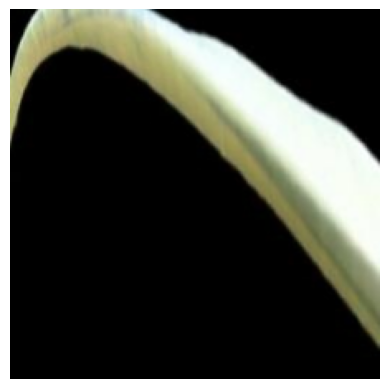

In [11]:
def preprocess_images(images):
    normalized = (images - np.min(images)) / (np.max(images) - np.min(images))
    return normalized

# Preprocessing
images = preprocess_images(images)

plt.imshow(images[5])
plt.axis('off')  # Turn off axis labels
plt.show()

In [16]:
from tensorflow.keras import layers, models, losses
import tensorflow as tf
from keras.optimizers import Adam

def model_Alexnet(x_train, y_train):
    model = models.Sequential()
    
    # Input shape should be defined based on your image dimensions
    model.add(layers.Conv2D(96, (11, 11), strides=(4, 4), padding='valid', input_shape=(224, 224, 3)))
    model.add(layers.Lambda(tf.nn.local_response_normalization))
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    model.add(layers.Conv2D(256, (5, 5), padding='same'))
    model.add(layers.Lambda(tf.nn.local_response_normalization))
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    model.add(layers.Conv2D(384, (3, 3), padding='same'))
    model.add(layers.Activation('relu'))

    model.add(layers.Conv2D(384, (3, 3), padding='same'))
    model.add(layers.Activation('relu'))

    model.add(layers.Conv2D(256, (3, 3), padding='same'))
    model.add(layers.Activation('relu'))

    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(9, activation='softmax')) 

    model.summary()
    model.compile(optimizer="adam", loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=64, epochs=30)
    
    return model, history


In [ ]:
# Melatih model dan mendapatkan history
model, history = model_Alexnet(images, encoded_labels)

# Mengambil akurasi pelatihan
train_accuracy = history.history['accuracy']

# Menampilkan akurasi
print("Akurasi Pelatihan:", train_accuracy)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_6 (Lambda)               │ (None, 54, 54, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 54, 54, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 26, 26, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_7 (Lambda)               │ (None, 26, 26, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 26, 26, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 12, 12, 384)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 12, 12, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 12, 12, 384)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 12, 12, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4096)           │   150,999,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 9)              │        36,873 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,564,425 (654.47 MB)

 Trainable params: 171,564,425 (654.47 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 331s 4s/step - accuracy: 0.1791 - loss: 2.0980
Epoch 2/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 274s 4s/step - accuracy: 0.2988 - loss: 1.8383
Epoch 3/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 221s 3s/step - accuracy: 0.3517 - loss: 1.7444
Epoch 4/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - accuracy: 0.3674 - loss: 1.7152
Epoch 5/30
46/74 ━━━━━━━━━━━━━━━━━━━━ 2:02 4s/step - accuracy: 0.3736 - loss: 1.6540